In [1]:
import sys
sys.path.append('../')

from illustris_frb import frb_simulation
from illustris_frb.utils import get_box_crossings

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from illustris_frb.helper import region 
import healpy as hp

In [3]:
def rotate_to_0(theta1, phi1, dtheta, dphi):
    """
    Converts between two spherical coordinate systems, (theta0, phi0) and
    (theta1, phi1). The forward transformation (0 to 1) occurs by rotating
    azimuthally by -dphi, then transforming into a system with a pole at 
    (dtheta, np.pi/2). This function is the backwards transformation.
    """

    theta0 = np.arccos( np.cos(theta1)*np.cos(dtheta) - np.sin(theta1)*np.sin(dtheta)*np.sin(phi1) )
    phi0 = np.arccos( np.sin(theta1)*np.cos(phi1) / np.sin(theta0) ) * \
           np.sign( ( np.cos(theta1)*np.sin(dtheta) + np.sin(theta1)*np.cos(dtheta)*np.sin(phi1) ) / np.cos(theta0) )

    return theta0, np.mod(phi0+dphi, 2*np.pi)

In [4]:
reg = region((np.pi/2, np.pi/2), 0.5, 0)

In [5]:
reg.rotmat

array([[ 8.77582562e-01, -2.18604414e-17,  4.79425539e-01],
       [ 3.68522538e-17,  1.00000000e+00, -2.18604414e-17],
       [-4.79425539e-01,  3.68522538e-17,  8.77582562e-01]])

In [8]:
dtheta, dphi = 0.4, 0.2
reg = region((dtheta, np.pi/2), dphi, 0)
theta, phi = 0, 0
reg.rotate(theta, phi)

(array(0.07777353), array(0.09215261))

In [13]:
rotate_to_0(theta, phi+0.2, 0.4, 0)

(0.6611292439810821, 0.9469539902035208)

In [7]:
reg.inverse_rotate(*reg.rotate(0.4, 0.6))

(array(0.4), array(0.6))

In [9]:
vhat = 1/np.sqrt(2) * np.array((1,1,0))
xrange=(1.5, 5)

get_box_crossings(vhat*xrange[1], vhat*xrange[0], boxsize=1)

(array([[2.        , 2.        , 0.        ],
        [3.        , 3.        , 0.        ],
        [3.53553391, 3.53553391, 0.        ]]),
 array([1.32842712, 2.74264069, 3.5       ]),
 array([[1, 1, 0],
        [2, 2, 0],
        [3, 3, 0]]))

In [3]:
origin = 500 * np.array([50, 70, 23])
sim = frb_simulation(origin=origin)

In [4]:
dest = origin + sim.boxsize * np.array((200,0,0))
xrange = sim.boxsize * np.array((2.5, 3.5))

x_edge_dists, xs, nes = sim.ray_trace(dest, xrange=xrange)
print(x_edge_dists)
print(xs)

[512500. 513000. 513500. 514000. 514500. 515000. 515500. 516000. 516500.
 517000. 517500. 518000. 518500. 519000. 519500. 520000. 520500. 521000.
 521500. 522000. 522500. 523000. 523500. 524000. 524500. 525000. 525500.
 526000. 526500. 527000. 527500. 528000. 528500. 529000. 529500. 530000.
 530500. 531000. 531500. 532000. 532500. 533000. 533500. 534000. 534500.
 535000. 535500. 536000. 536500. 537000. 537500. 538000. 538500. 539000.
 539500. 540000. 540500. 541000. 541500. 542000. 542500. 543000. 543500.
 544000. 544500. 545000. 545500. 546000. 546500. 547000. 547500. 548000.
 548500. 549000. 549500. 550000. 550500. 551000. 551500. 552000. 552500.
 553000. 553500. 554000. 554500. 555000. 555500. 556000. 556500. 557000.
 557500. 558000. 558500. 559000. 559500. 560000. 560500. 561000. 561500.
 562000. 562500. 563000. 563500. 564000. 564500. 565000. 565500. 566000.
 566500. 567000. 567500. 568000. 568500. 569000. 569500. 570000. 570500.
 571000. 571500. 572000. 572500. 573000. 573500. 57

In [5]:
import numpy as np
np.matmul(np.eye(3), np.atleast_2d(np.array(((1,2,3), (4,5,6))).T) ).T

array([[1., 2., 3.],
       [4., 5., 6.]])

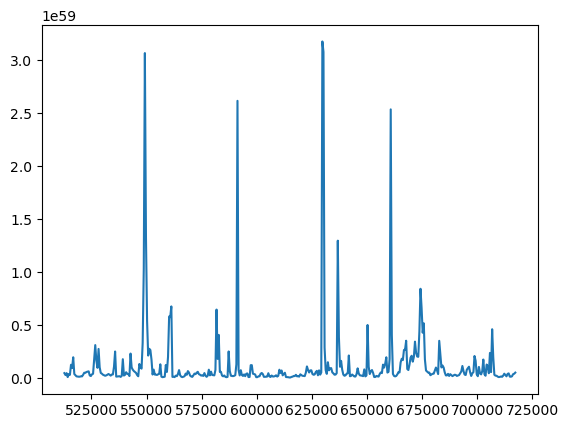

In [5]:
plt.plot(xs, nes)

In [ ]:
snaps = (84, 83)
xrange = (540567.881612, 625366.418720) #snapshots 84 and 85, z=0.2